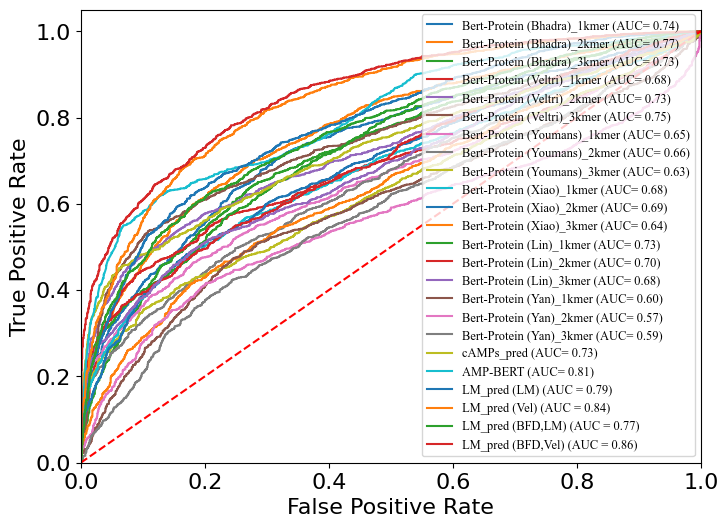

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve
# def save_preds(model_loc, LM, save_file):
#     clf = keras.models.load_model(model_loc)
#     x_test = load_INDEP_X_data(LM)
#     pred = clf.predict(x_test, batch_size=8)
#     np.save(save_file, pred)

# save_preds('Keras_Models/LMPred train model/BERT_best_model.epoch09-loss0.36.hdf5','BERT','independent test data/INDEP_BERT(LM)_Model_Preds.npy')
# save_preds('Keras_Models/Veltri train model/BERT_best_model.epoch01-loss0.72.hdf5','BERT','independent test data/INDEP_BERT(Vel)_Model_Preds.npy')
# save_preds('Keras_Models/LMPred train model/BERT_BFD_best_model.epoch07-loss0.31.hdf5','BERT_BFD','independent test data/INDEP_BERT_BFD(LM)_Model_Preds.npy')
# save_preds('Keras_Models/Veltri train model/BERT_BFD_best_model.epoch01-loss0.71.hdf5','BERT_BFD','independent test data/INDEP_BERT_BFD(Vel)_Model_Preds.npy')

pred1=np.load('independent test data/INDEP_BERT(LM)_Model_Preds.npy')
pred2=np.load('independent test data/INDEP_BERT(Vel)_Model_Preds.npy')
pred3=np.load('independent test data/INDEP_BERT_BFD(LM)_Model_Preds.npy')
pred4=np.load('independent test data/INDEP_BERT_BFD(Vel)_Model_Preds.npy')

y_test_INDEP = pd.read_csv("independent test data\y_test.csv", header=None)[0]

plt.figure(figsize=(8,6), dpi=100)

models=[

{
    'label': 'LM_pred (LM)',
    'pred': pred1
},
{
    'label': 'LM_pred (Vel)',
    'pred': pred2
},
{
   'label': 'LM_pred (BFD,LM)',
    'pred': pred3 
},
{
    'label': 'LM_pred (BFD,Vel)',
    'pred': pred4 
},
]
a=['black','blue','blueviolet','brown','burlywood','chocolate','coral','cornflowerblue',
       'navy','orange','pink','red','purple','seagreen','yellow','yellowgreen','maroon','slategray','royalblue']

file=['model predict result\Bert-Protein (Bhadra)_1kmer.csv',
             'model predict result\Bert-Protein (Bhadra)_2kmer.csv',
              'model predict result\Bert-Protein (Bhadra)_3kmer.csv',
              'model predict result\Bert-Protein (Veltri)_1kmer.csv',
              'model predict result\Bert-Protein (Veltri)_2kmer.csv',
              'model predict result\Bert-Protein (Veltri)_3kmer.csv',
              'model predict result\Bert-Protein (Youmans)_1kmer.csv',
              'model predict result\Bert-Protein (Youmans)_2kmer.csv',
              'model predict result\Bert-Protein (Youmans)_3kmer.csv',
              'model predict result\Bert-Protein (Xiao)_1kmer.csv',
              'model predict result\Bert-Protein (Xiao)_2kmer.csv',
              'model predict result\Bert-Protein (Xiao)_3kmer.csv',
              'model predict result\Bert-Protein (Lin)_1kmer.csv',
              'model predict result\Bert-Protein (Lin)_2kmer.csv',
              'model predict result\Bert-Protein (Lin)_3kmer.csv',
              'model predict result\Bert-Protein (Yan)_1kmer.csv',
              'model predict result\Bert-Protein (Yan)_2kmer.csv',
              'model predict result\Bert-Protein (Yan)_3kmer.csv',
              'model predict result/cAMPs_pred.csv',
              'model predict result/AMP-BERT.csv',
              ]
for i in range(len(file)):
    data=pd.read_csv(file[i])
    data=pd.DataFrame(data)
    fpr, tpr, thresholds = roc_curve(list(data['label']),list(data['pre_prob']))
    # precision, recall, _ = precision_recall_curve(list(data['label']),list(data['pre_prob']))
    roc_auc = auc(fpr, tpr)
    # aupr=auc(recall, precision)
    plt.plot(fpr, tpr, label='{} (AUC= %0.2f)'.format(file[i][21:-4])% roc_auc)
    # plt.plot(recall, precision, label='{} (AUPR= %0.2f)'.format(file[i][21:-4])% aupr)
    

for m in models:
    y_pred = m['pred']
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test_INDEP, y_pred)
    # precision, recall, _ = precision_recall_curve(y_test_INDEP, y_pred)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test_INDEP, y_pred)
    # aupr=auc(recall, precision)
# Plot the computed values
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m['label'], auc))
    # plt.plot(recall, precision, label='%s (AUPR = %0.2f)' % (m['label'], aupr))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rc('font',family='Times New Roman')

plt.xlabel('False Positive Rate',size=16)
plt.ylabel('True Positive Rate',size=16)
# plt.xlabel('Recall',size=16)
# plt.ylabel('Precision',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
# plt.title('Receiver Operating Characteristic Curve\nModels Tested on Independent Dataset', fontweight='bold')
plt.legend(loc="lower right",fontsize=9)
plt.savefig('independent test data/ROC_Curves.png', bbox_inches='tight')
plt.show()